In [100]:
import pandas as pd
import numpy as np 
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from math import sqrt
from  sklearn.metrics.pairwise import pairwise_distances
from tensorflow.keras import Sequential
import scipy.sparse as sp
from scipy.sparse.linalg import svds
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sys
import math 
from zipfile import ZipFile
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path
import matplotlib.pyplot as plt

In [129]:
movielens_data_file_url = (
    "http://files.grouplens.org/datasets/movielens/ml-latest-small.zip"
)
movielens_zipped_file = keras.utils.get_file(
    "ml-latest-small.zip", movielens_data_file_url, extract=False
)
keras_datasets_path = Path(movielens_zipped_file).parents[0]
movielens_dir = keras_datasets_path / "ml-latest-small"

# Only extract the data the first time the script is run.
if not movielens_dir.exists():
    with ZipFile(movielens_zipped_file, "r") as zip:
        # Extract files
        print("Extracting all the files now...")
        zip.extractall(path=keras_datasets_path)
        print("Done!")

ratings_file = movielens_dir / "ratings.csv"
df = pd.read_csv(ratings_file)

In [130]:
user_ids = df["userId"].unique().tolist()
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
movie_ids = df["movieId"].unique().tolist()
movie2movie_encoded = {x: i for i, x in enumerate(movie_ids)}
movie_encoded2movie = {i: x for i, x in enumerate(movie_ids)}
df["user"] = df["userId"].map(user2user_encoded)
df["movie"] = df["movieId"].map(movie2movie_encoded)

num_users = len(user2user_encoded)
num_movies = len(movie_encoded2movie)
df["rating"] = df["rating"].values.astype(np.float32)
# min and max ratings will be used to normalize the ratings later
min_rating = min(df["rating"])
max_rating = max(df["rating"])

print(
    "Number of users: {}, Number of Movies: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_movies, min_rating, max_rating
    )
)

Number of users: 610, Number of Movies: 9724, Min rating: 0.5, Max rating: 5.0


In [131]:
x = df[["userId", "movieId"]].values
y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
# Assuming training on 90% of the data and validating on 10%.
train_indices = int(0.9 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:],
)

In [160]:
model = tf.keras.Sequential([    
    tf.keras.layers.Dense(n_movies, activation='relu'),
    tf.keras.layers.Dense(1000, activation='relu')])

In [161]:
model.compile(loss='mse', optimizer='adam')
history = model.fit(input_data, ratings, epochs=10, batch_size=64)

Epoch 1/10
125/125 [==============================] - 12s 91ms/step - loss: 3547.0620
Epoch 2/10
125/125 [==============================] - 12s 93ms/step - loss: 201.6800
Epoch 3/10
125/125 [==============================] - 14s 108ms/step - loss: 112.1586
Epoch 4/10
125/125 [==============================] - 13s 107ms/step - loss: 431.7161
Epoch 5/10
125/125 [==============================] - 14s 111ms/step - loss: 162.3996
Epoch 6/10
125/125 [==============================] - 13s 103ms/step - loss: 178.7950
Epoch 7/10
125/125 [==============================] - 12s 95ms/step - loss: 301.2480
Epoch 8/10
125/125 [==============================] - 11s 89ms/step - loss: 248.5367
Epoch 9/10
125/125 [==============================] - 12s 97ms/step - loss: 194.4657
Epoch 10/10
125/125 [==============================] - 12s 92ms/step - loss: 290.7868


In [158]:
predictions = model.predict(input_data)

NameError: name 'user_movie_array' is not defined

In [154]:
predictions_pd = pd.DataFrame(predictions)
predictions_pd

,0
0,0.520861
1,0.529555
2,0.000071
3,0.008813
4,0.522988
...,...
7995,0.001443
7996,0.000001
7997,0.344042
7998,0.452205


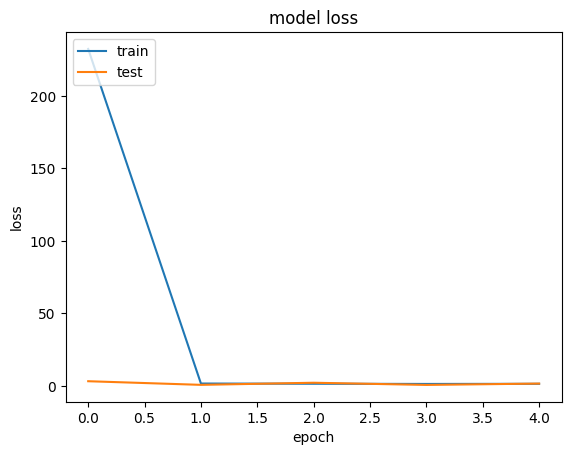

In [155]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [156]:
user_similarity = pairwise_distances(predictions, metric='cosine')
user_similarity_pd = pd.DataFrame(user_similarity)

In [157]:
user_similarity_pd

,0,1,2,3,4,5,6,7,8,9,...,7990,7991,7992,7993,7994,7995,7996,7997,7998,7999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
users = np.unique(df['userId'])
movies = np.unique(df['movieId'])

In [24]:
data = np.zeros((n_users, n_movies))

for _, row in df.iterrows():
    user_idx = np.where(users == row[0])[0]
    movie_idx = np.where(movies == row[1])[0]
    data[user_idx - 1, movie_idx] = row[2]


In [51]:
test_user_id = 20

result = pd.DataFrame(index = range(len(user_similarity) - 1),columns=['Similarity'])

result['Similarity'] = sorted(np.delete(user_similarity[test_user_id], test_user_id),reverse=True)

result = result.sort_values(by="Similarity",ascending=False)

result

,Similarity
0,1.0
5328,1.0
5341,1.0
5340,1.0
5339,1.0
...,...
2661,1.0
2660,1.0
2659,1.0
2658,1.0


In [34]:
def find_n_similar_users(id,n,data,user_similarity):
    
    users = range(user_similarity.shape[0])
    
    result = pd.DataFrame(index=users, columns=["Similarity"])

    result["Similarity"] = user_similarity[0, :]

    result.drop(index=id, inplace=True)

    result = result.sort_values(by="Similarity", ascending=False)

    target_user_id = id
    similar_users_ids = []
    for index in data.index:
        curr_user_index = df.iloc[index]['userId']
        if curr_user_index != target_user_id and curr_user_index not in similar_users_ids:
            similar_users_ids.append(int(curr_user_index))
        if len(similar_users_ids) == n:
            break
    return similar_users_ids
        

In [36]:
target_user_id = 1
num_similar_users = 10

In [48]:
similar_users = find_n_similar_users(target_user_id,num_similar_users,result,user_similarity)
similar_users

[11, 12, 10, 9, 6, 8, 7, 13, 3, 2]